<a href="https://colab.research.google.com/github/swjh9523/KaggleStruggle/blob/main/Kaggle_Loan_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import missingno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


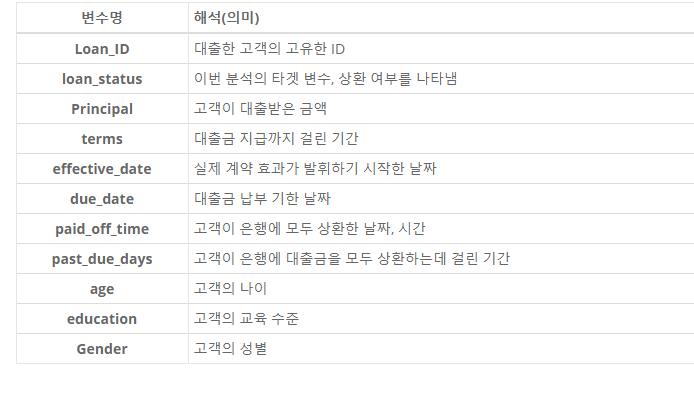

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


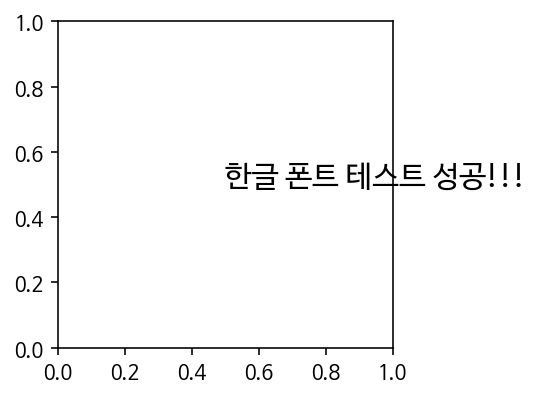

In [ ]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터파일/Loan payments data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [ ]:
# 결측치 확인
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
# 결측치가 있는 컬럼 모아보기

df[['paid_off_time','past_due_days']]

,paid_off_time,past_due_days
0,9/14/2016 19:31,NaN
1,10/7/2016 9:00,NaN
2,9/25/2016 16:58,NaN
3,9/22/2016 20:00,NaN
4,9/23/2016 21:36,NaN
...,...,...
495,10/14/2016 19:08,3.0
496,10/10/2016 20:02,14.0
497,9/29/2016 11:49,3.0
498,11/11/2016 22:40,1.0


In [ ]:
# 분석에 불필요한 컬럼 제거
df.drop(['Loan_ID','paid_off_time','past_due_days'],axis=1, inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [ ]:
import datetime as dt

df['effective_date'].astype('datetime64')

0     2016-09-08
1     2016-09-08
2     2016-09-08
3     2016-09-08
4     2016-09-09
         ...    
495   2016-09-12
496   2016-09-12
497   2016-09-12
498   2016-09-12
499   2016-09-12
Name: effective_date, Length: 500, dtype: datetime64[ns]

In [ ]:
# 개별 유니크 값 확인

print(df['terms'].unique())
print('\n',df['Principal'].unique())
print('\n',df['effective_date'].unique())
print('\n',df['due_date'].unique())
print('\n',df['education'].unique())

[30 15  7]

 [1000  300  800  900  700  500]

 ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']

 ['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']

 ['High School or Below' 'Bechalor' 'college' 'Master or Above']


In [ ]:
# 변수변환하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# loan_status 2 = PAID OFF , 1 = COLLECTION , 0 = COLLECTION_PAID_OFF
le.fit(df['loan_status'])
df['loan_status'] = le.transform(df['loan_status'])

# 성별  1 = male, 2 = female
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

# Education 0 = Bechalor, 1 = High School or Below, 2 = Master or Above ,3 = college
le.fit(df['education'])
df['education'] = le.transform(df['education'])

In [ ]:
df['due_date'] = df['due_date'].astype('datetime64')
df['effective_date'] = df['effective_date'].astype('datetime64')
df['date'] = df['due_date'].astype('datetime64') - df['effective_date'].astype('datetime64')
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,date
0,2,1000,30,2016-09-08,2016-10-07,45,1,1,29 days
1,2,1000,30,2016-09-08,2016-10-07,50,0,0,29 days
2,2,1000,30,2016-09-08,2016-10-07,33,0,0,29 days
3,2,1000,15,2016-09-08,2016-09-22,27,3,1,14 days
4,2,1000,30,2016-09-09,2016-10-08,28,3,0,29 days


0   29 days
Name: date, dtype: timedelta64[ns]

# EDA

* loan_status
  - 정해진 기간 내에 대출금을 모두 상환하는데 성공한 고객, 실패한 고객

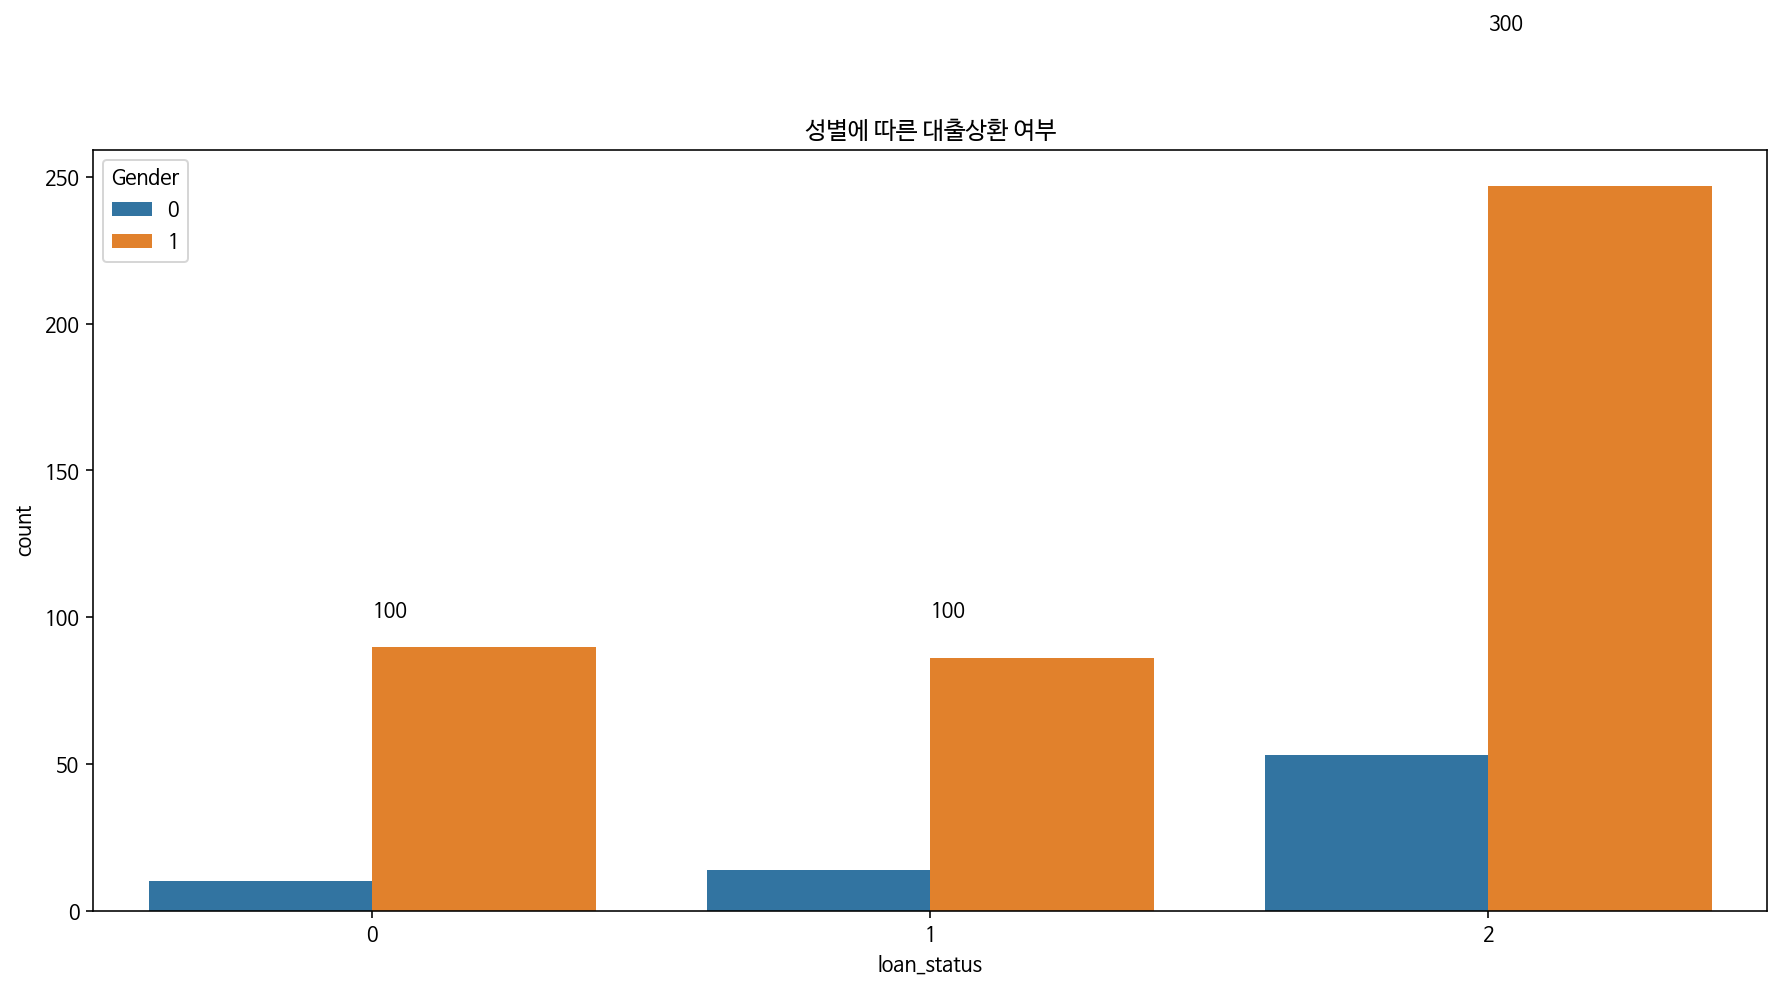

In [ ]:
df['loan_status'].value_counts().index
df_loan_count = df['loan_status'].value_counts()
plt.figure(figsize=(15,7))
plt.title('성별에 따른 대출상환 여부')
h = sns.countplot(data=df, x='loan_status', hue='Gender')
for i, val in enumerate(df_loan_count.index):
 h.text(x = i, y = df_loan_count[i], s = df_loan_count[i])

In [ ]:
df.groupby(['Gender','loan_status'])['loan_status'].value_counts()

Gender  loan_status  loan_status
0       0            0               10
        1            1               14
        2            2               53
1       0            0               90
        1            1               86
        2            2              247
Name: loan_status, dtype: int64

In [ ]:
df['Principal'].value_counts().index
df_count = df['Principal'].value_counts()

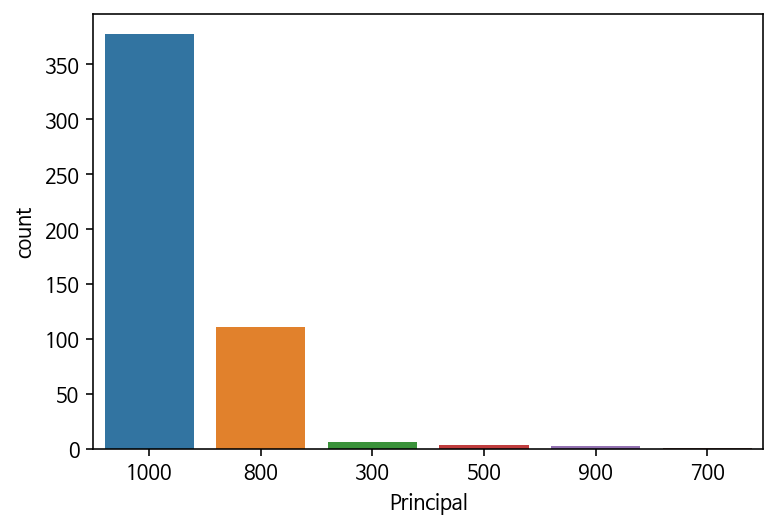

In [ ]:
plt.title('')
f = sns.countplot(data=df, x='Principal',order=df['Principal'].value_counts().index)
# for i, val in enumerate(df_count.index):
#   f.text(x = i, y = df_count[i], s = df_count[i])

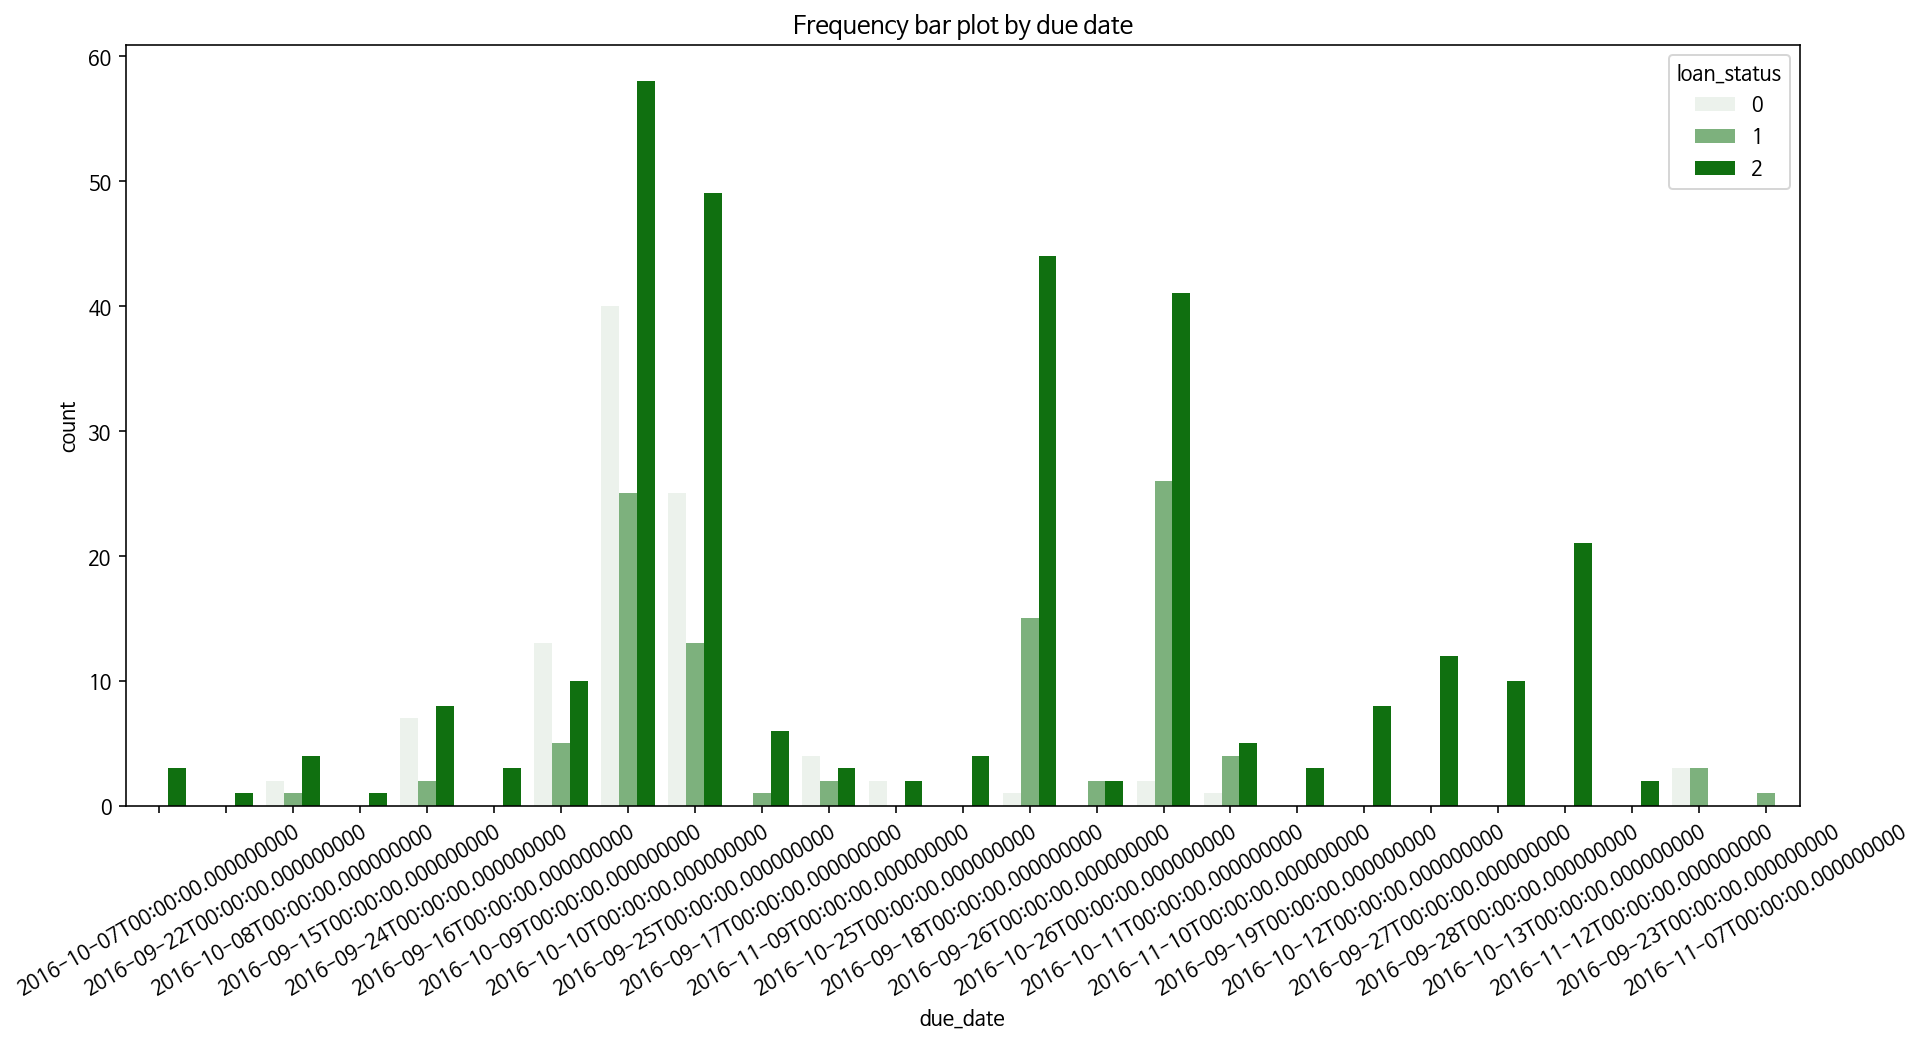

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Frequency bar plot by due date')
plt.xticks(rotation=30)
h = sns.countplot(data=df, x='due_date', hue='loan_status',color='Green')

SyntaxError: ignored

In [ ]:
(from sklearn.model_selection import train_test_split
target_df = df['loan_status'].copy()
features_df = df.drop(['loan_status'],axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df,
                                                    test_size = 0.2, random_state = 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 예측 정확도 : ',round(accuracy_score(y_test, dt_pred),2))

# RandomForestClassifier 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 예측 정확도 : ',round(accuracy_score(y_test, rf_pred),2))

# LogisticRegreesion 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegreesion 예측 정확도 : ',round(accuracy_score(y_test, lr_pred),2))

TypeError: ignored